In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn


In [2]:
# Step 1: Install Kaggle (if not already installed)
!pip install kaggle

# Step 2: Upload your kaggle.json file containing your API credentials
# Run the cell below and use the file upload widget to select your kaggle.json.
from google.colab import files
uploaded = files.upload()

# Step 3: Create the .kaggle directory and copy the kaggle.json file there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 4: Download the Telco Customer Churn dataset
!kaggle datasets download -d blastchar/telco-customer-churn

# Step 5: Unzip the downloaded dataset
!unzip -o telco-customer-churn.zip


Saving archive (7).zip to archive (7).zip
Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 530MB/s]
Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [3]:
import pandas as pd

# Adjust the filename if necessary
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
# Check for duplicate rows
print("\nChecking for Duplicate Rows:")
duplicate_rows = df.duplicated().sum()
if duplicate_rows == 0:
    print("No duplicate rows found.")
else:
    print(f"Found {duplicate_rows} duplicate rows. Consider dropping them.")
    # df.drop_duplicates(inplace=True) # Uncomment to drop duplicates if desired


Checking for Duplicate Rows:
No duplicate rows found.


In [10]:
# --- Handling Missing Values ---
print("\n--- Handling Missing Values ---")

# Identify columns with missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0] # Filter to show only columns with missing values
print("\nColumns with Missing Values before handling:")
if missing_values.empty:
    print("No missing values found initially.")
else:
    print(missing_values)


--- Handling Missing Values ---

Columns with Missing Values before handling:
TotalCharges    11
dtype: int64


In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [13]:
# Now check for missing values specifically in 'TotalCharges' after coercion
missing_total_charges = df['TotalCharges'].isnull().sum()
if missing_total_charges > 0:
    print(f"\n'{missing_total_charges}' missing values found in 'TotalCharges' after coercion.")
    print("Handling missing 'TotalCharges' values...")

    # FIX: Assign the result of fillna directly back to the column
    # This avoids the chained assignment warning.
    df['TotalCharges'] = df['TotalCharges'].fillna(0)
    print("Missing 'TotalCharges' imputed with 0.")

In [14]:
# Verify that 'TotalCharges' is now numeric and has no missing values
print("\nInfo of the DataFrame after handling 'TotalCharges' missing values:")
df.info()


Info of the DataFrame after handling 'TotalCharges' missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          70

In [15]:
# Re-check all missing values to confirm 'TotalCharges' is handled
missing_values_after_handling = df.isnull().sum()
missing_values_after_handling = missing_values_after_handling[missing_values_after_handling > 0]
print("\nColumns with Missing Values after handling (should be empty if only TotalCharges was missing):")
if missing_values_after_handling.empty:
    print("No more missing values found in the DataFrame.")
else:
    print(missing_values_after_handling)


Columns with Missing Values after handling (should be empty if only TotalCharges was missing):
No more missing values found in the DataFrame.


In [16]:
print("\nData Analysis and Preprocessing steps completed for initial exploration and missing value handling.")


Data Analysis and Preprocessing steps completed for initial exploration and missing value handling.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
try:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['TotalCharges'] = df['TotalCharges'].fillna(0)
    print("Dataset loaded and TotalCharges processed.")
except FileNotFoundError:
    print("Error: The file 'WA_Fn-UseC_-Telco-Customer-Churn.csv' was not found.")
    exit()

Dataset loaded and TotalCharges processed.


In [19]:
# Identify numerical columns for outlier analysis
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [20]:
print("\n--- Visualizing Numerical Features for Outliers ---")


--- Visualizing Numerical Features for Outliers ---


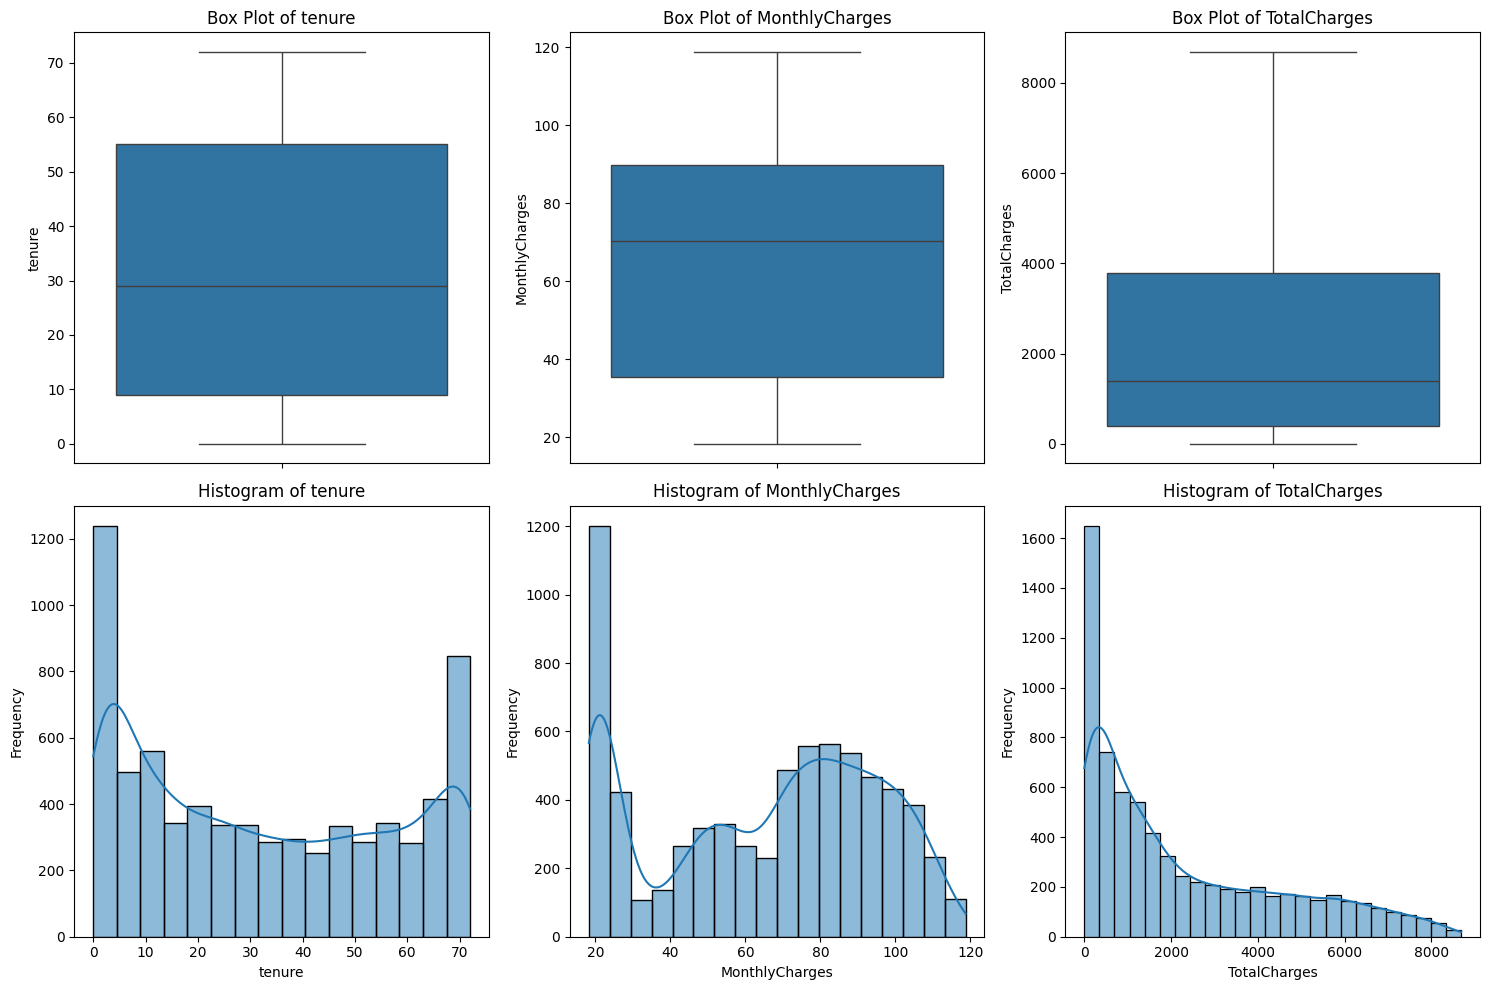

In [21]:
# Create subplots for box plots and histograms
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    # Box plot for outlier identification
    plt.subplot(2, len(numerical_cols), i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

    # Histogram for distribution and skewness
    plt.subplot(2, len(numerical_cols), i + len(numerical_cols) + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [24]:
print("\n--- Handling Outliers Strategies ---")
# Strategy: Log Transformation for 'TotalCharges'
# 'TotalCharges' is typically right-skewed and often has 0 values (for new customers).
# Log transformation (log1p) helps normalize its distribution and handle zeros gracefully.



--- Handling Outliers Strategies ---


In [25]:
print(f"\nSkewness of 'TotalCharges' before transformation: {df['TotalCharges'].skew():.2f}")

# Apply log transformation to 'TotalCharges' and create a new column
df['TotalCharges_log'] = np.log1p(df['TotalCharges'])

print(f"Skewness of 'TotalCharges_log' after transformation: {df['TotalCharges_log'].skew():.2f}")
print("A new feature 'TotalCharges_log' has been created using log transformation.")



Skewness of 'TotalCharges' before transformation: 0.96
Skewness of 'TotalCharges_log' after transformation: -0.82
A new feature 'TotalCharges_log' has been created using log transformation.


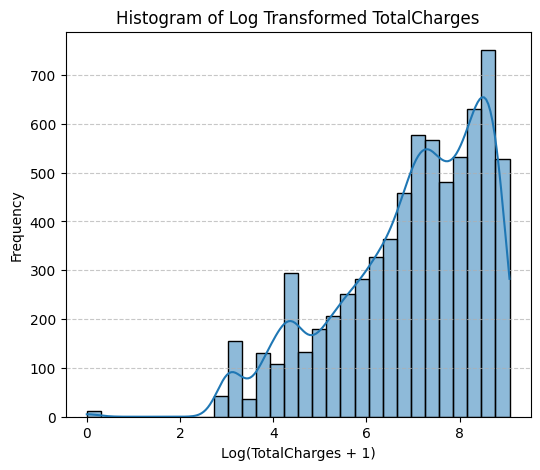

In [26]:
# Visualize the transformed 'TotalCharges_log'
plt.figure(figsize=(6, 5))
sns.histplot(df['TotalCharges_log'], kde=True, bins=30)
plt.title('Histogram of Log Transformed TotalCharges')
plt.xlabel('Log(TotalCharges + 1)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [27]:
print("\n'tenure' and 'MonthlyCharges' typically do not require explicit outlier capping/flooring")
print("for this dataset, as their distributions are generally more uniform or less extremely skewed.")
print("Standard scaling (e.g., StandardScaler) will be applied during feature scaling if needed for models.")

print("\nOutlier handling visualization and strategy (Log Transformation) completed.")
# The 'df' DataFrame now contains 'TotalCharges_log' for further use in modeling.


'tenure' and 'MonthlyCharges' typically do not require explicit outlier capping/flooring
for this dataset, as their distributions are generally more uniform or less extremely skewed.
Standard scaling (e.g., StandardScaler) will be applied during feature scaling if needed for models.

Outlier handling visualization and strategy (Log Transformation) completed.


In [29]:
# Convert 'Churn' column to numeric (0 and 1) for easier analysis
# 'Yes' -> 1 (Churn), 'No' -> 0 (No Churn)
df['Churn_Numeric'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


--- Analyzing Historical Customer Data (Usage Patterns and Demographics) ---

### 1. Demographic Analysis ###


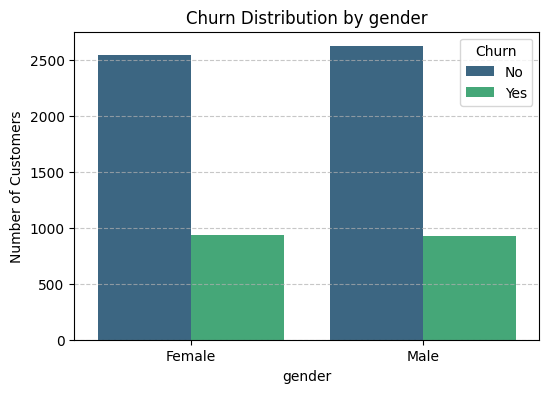


Churn Rate by gender:
 Churn_Numeric  Churn_Rate (%) gender
      0.269209       26.920872 Female
      0.261603       26.160338   Male


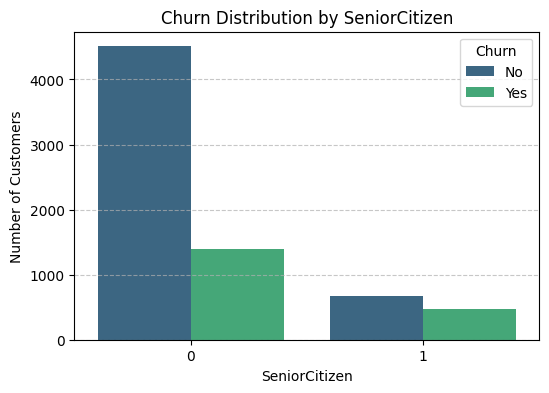


Churn Rate by SeniorCitizen:
 Churn_Numeric  Churn_Rate (%)  SeniorCitizen
      0.416813       41.681261              1
      0.236062       23.606168              0


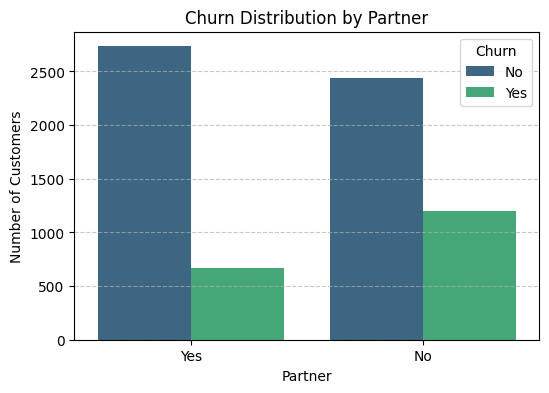


Churn Rate by Partner:
 Churn_Numeric  Churn_Rate (%) Partner
      0.329580       32.957979      No
      0.196649       19.664903     Yes


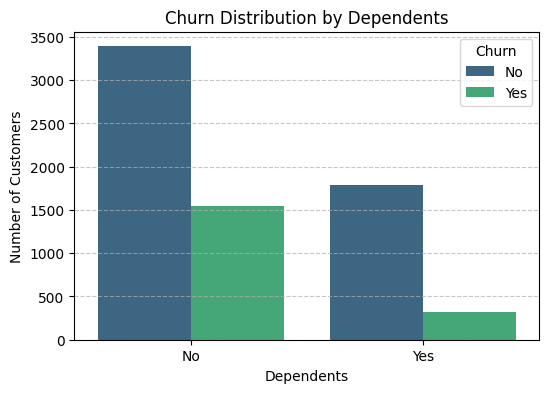


Churn Rate by Dependents:
 Churn_Numeric  Churn_Rate (%) Dependents
      0.312791       31.279140         No
      0.154502       15.450237        Yes


In [31]:
print("\n--- Analyzing Historical Customer Data (Usage Patterns and Demographics) ---")

# --- 1. Demographic Analysis ---
print("\n### 1. Demographic Analysis ###")
demographic_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for col in demographic_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='Churn', palette='viridis')
    plt.title(f'Churn Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Customers')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Calculate churn rate for each category
    churn_rate = df.groupby(col)['Churn_Numeric'].mean().reset_index()
    churn_rate['Churn_Rate (%)'] = churn_rate['Churn_Numeric'] * 100
    print(f"\nChurn Rate by {col}:")
    print(churn_rate[['Churn_Numeric', 'Churn_Rate (%)', col]].sort_values(by='Churn_Rate (%)', ascending=False).to_string(index=False)) # Use to_string to display all rows without truncation


### 2. Service/Usage Pattern and Contract Analysis ###


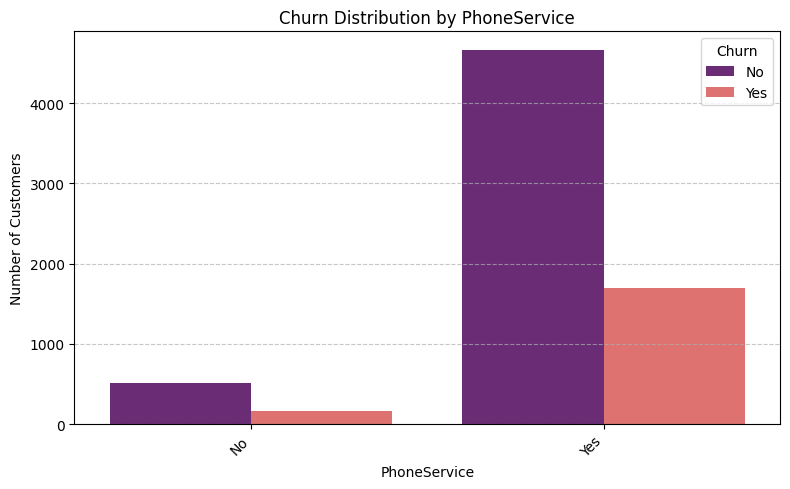


Churn Rate by PhoneService:
 Churn_Numeric  Churn_Rate (%) PhoneService
      0.267096       26.709637          Yes
      0.249267       24.926686           No


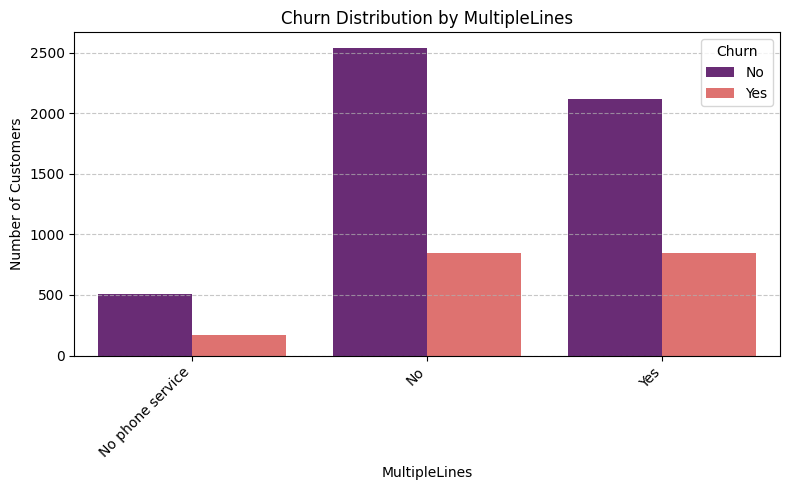


Churn Rate by MultipleLines:
 Churn_Numeric  Churn_Rate (%)    MultipleLines
      0.286099       28.609896              Yes
      0.250442       25.044248               No
      0.249267       24.926686 No phone service


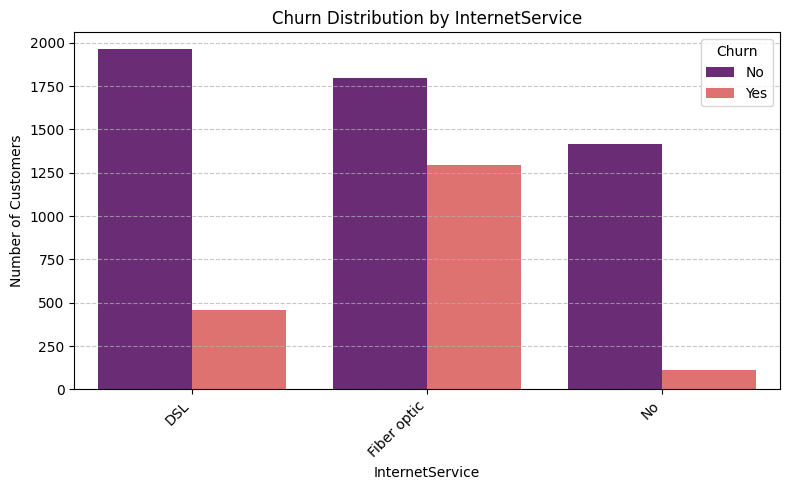


Churn Rate by InternetService:
 Churn_Numeric  Churn_Rate (%) InternetService
      0.418928       41.892765     Fiber optic
      0.189591       18.959108             DSL
      0.074050        7.404980              No


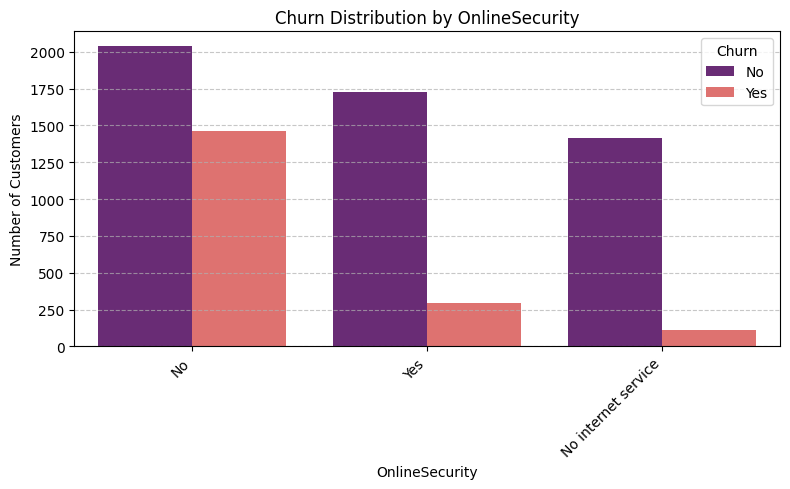


Churn Rate by OnlineSecurity:
 Churn_Numeric  Churn_Rate (%)      OnlineSecurity
      0.417667       41.766724                  No
      0.146112       14.611194                 Yes
      0.074050        7.404980 No internet service


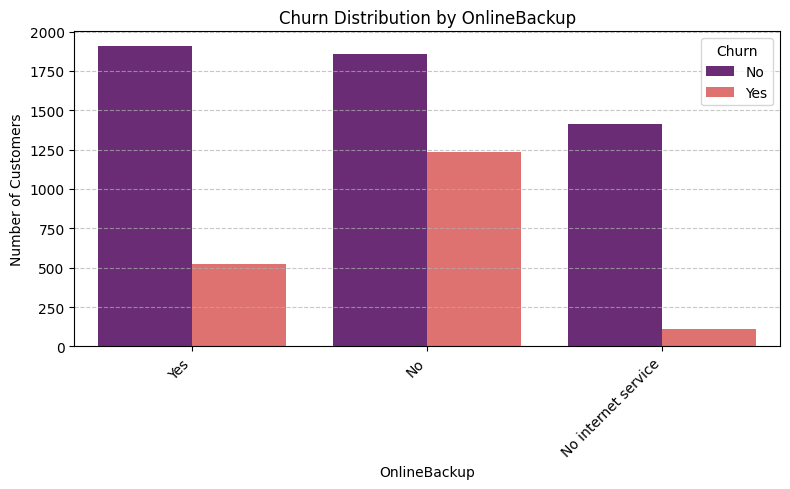


Churn Rate by OnlineBackup:
 Churn_Numeric  Churn_Rate (%)        OnlineBackup
      0.399288       39.928756                  No
      0.215315       21.531494                 Yes
      0.074050        7.404980 No internet service


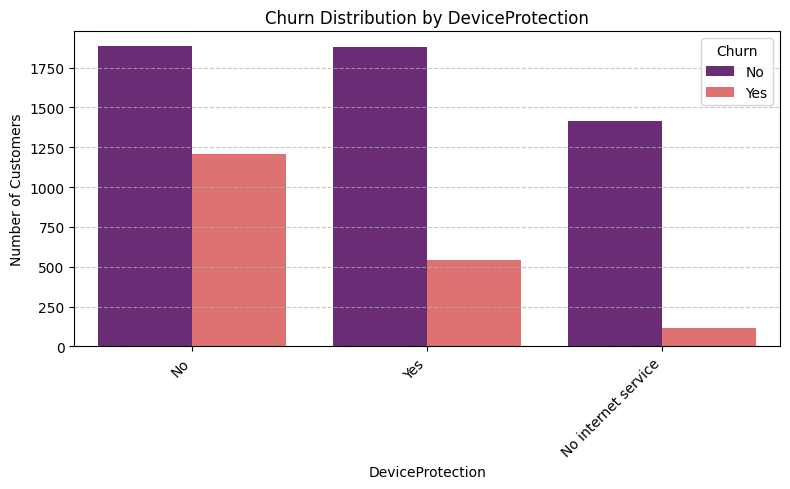


Churn Rate by DeviceProtection:
 Churn_Numeric  Churn_Rate (%)    DeviceProtection
      0.391276       39.127625                  No
      0.225021       22.502064                 Yes
      0.074050        7.404980 No internet service


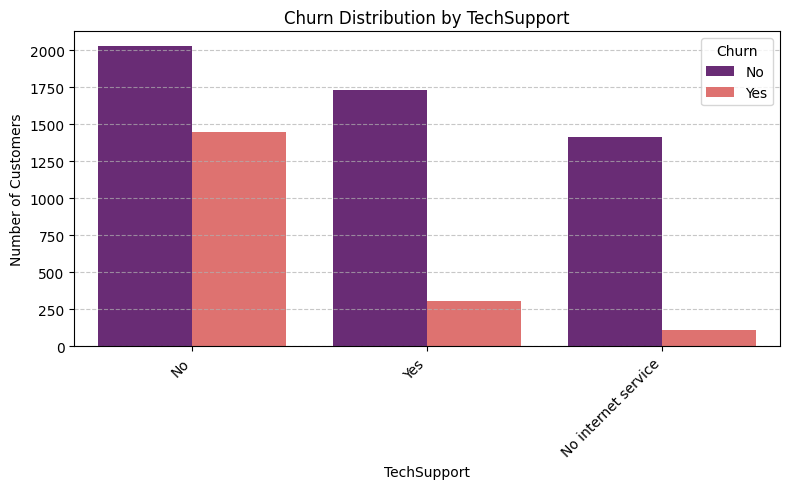


Churn Rate by TechSupport:
 Churn_Numeric  Churn_Rate (%)         TechSupport
      0.416355       41.635474                  No
      0.151663       15.166341                 Yes
      0.074050        7.404980 No internet service


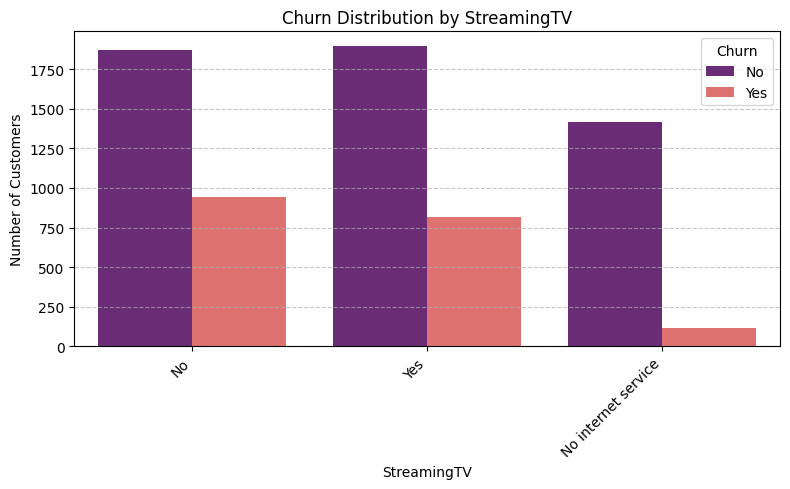


Churn Rate by StreamingTV:
 Churn_Numeric  Churn_Rate (%)         StreamingTV
      0.335231       33.523132                  No
      0.300702       30.070188                 Yes
      0.074050        7.404980 No internet service


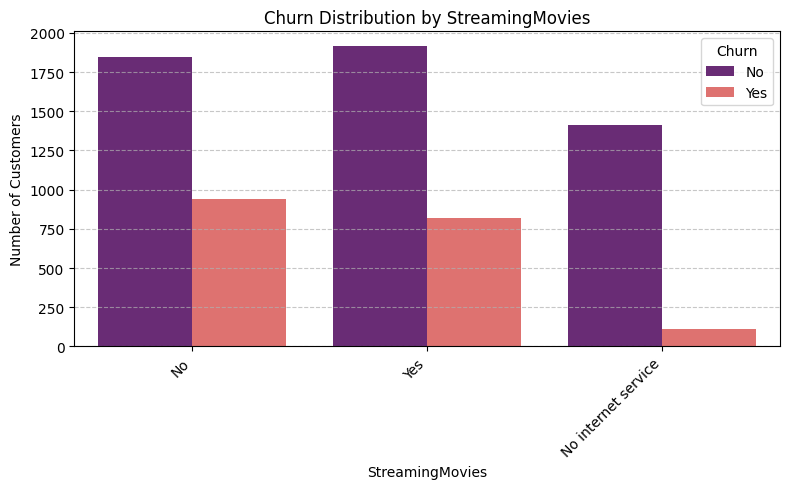


Churn Rate by StreamingMovies:
 Churn_Numeric  Churn_Rate (%)     StreamingMovies
      0.336804       33.680431                  No
      0.299414       29.941435                 Yes
      0.074050        7.404980 No internet service


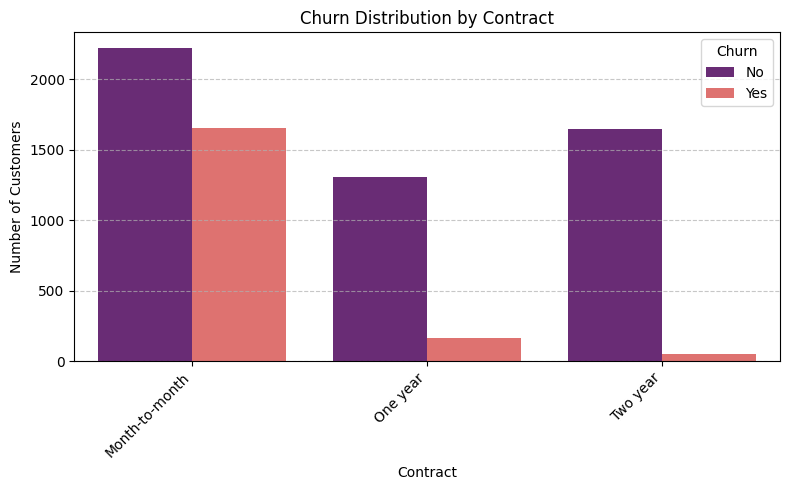


Churn Rate by Contract:
 Churn_Numeric  Churn_Rate (%)       Contract
      0.427097       42.709677 Month-to-month
      0.112695       11.269518       One year
      0.028319        2.831858       Two year


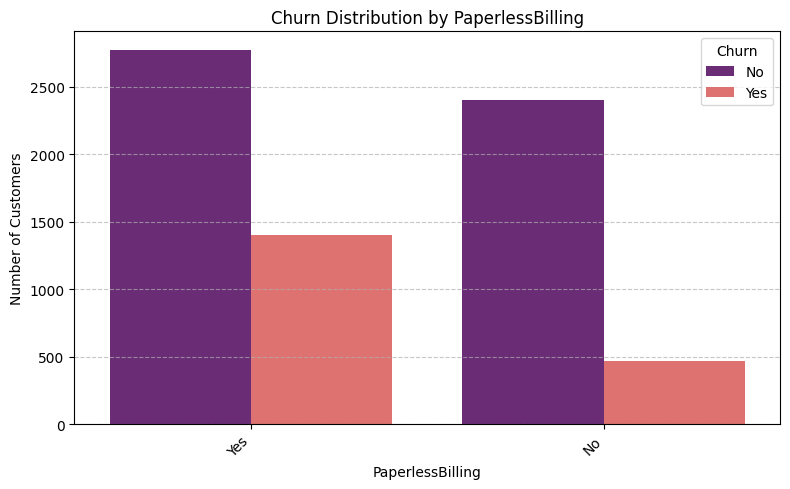


Churn Rate by PaperlessBilling:
 Churn_Numeric  Churn_Rate (%) PaperlessBilling
      0.335651       33.565092              Yes
      0.163301       16.330084               No


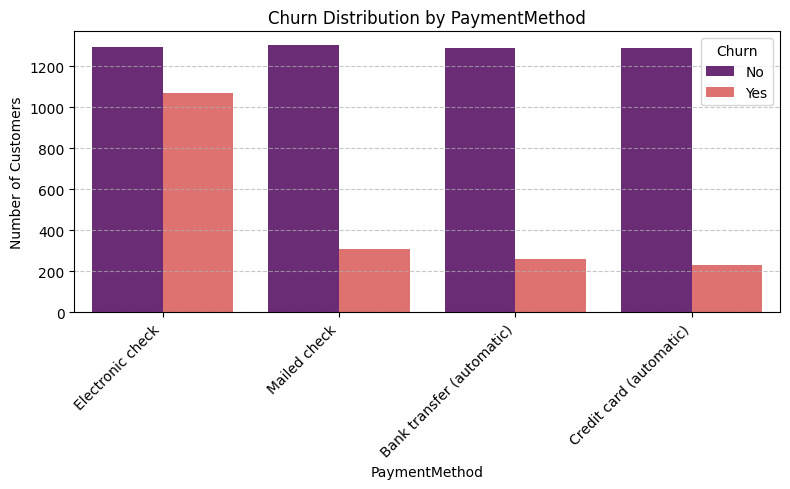


Churn Rate by PaymentMethod:
 Churn_Numeric  Churn_Rate (%)             PaymentMethod
      0.452854       45.285412          Electronic check
      0.191067       19.106700              Mailed check
      0.167098       16.709845 Bank transfer (automatic)
      0.152431       15.243101   Credit card (automatic)


In [32]:
# --- 2. Service/Usage Pattern and Contract Analysis ---
print("\n### 2. Service/Usage Pattern and Contract Analysis ###")
service_contract_cols = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
]

for col in service_contract_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, hue='Churn', palette='magma')
    plt.title(f'Churn Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Calculate churn rate for each category
    churn_rate = df.groupby(col)['Churn_Numeric'].mean().reset_index()
    churn_rate['Churn_Rate (%)'] = churn_rate['Churn_Numeric'] * 100
    print(f"\nChurn Rate by {col}:")
    print(churn_rate[['Churn_Numeric', 'Churn_Rate (%)', col]].sort_values(by='Churn_Rate (%)', ascending=False).to_string(index=False))


### 3. Numerical Feature Analysis (Usage Patterns) ###


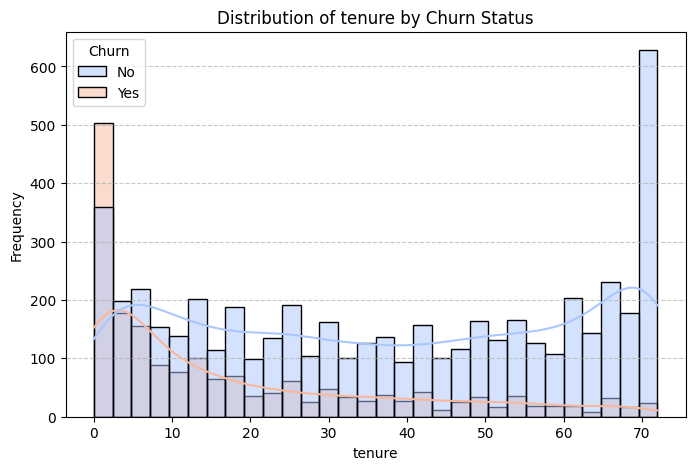

/tmp/ipython-input-33-3036117263.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='pastel')


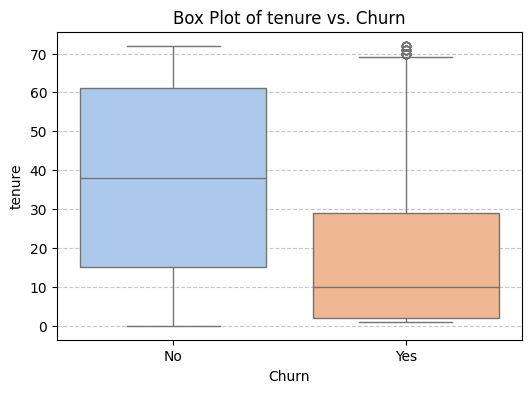


Descriptive Statistics for tenure by Churn Status:
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
No     5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


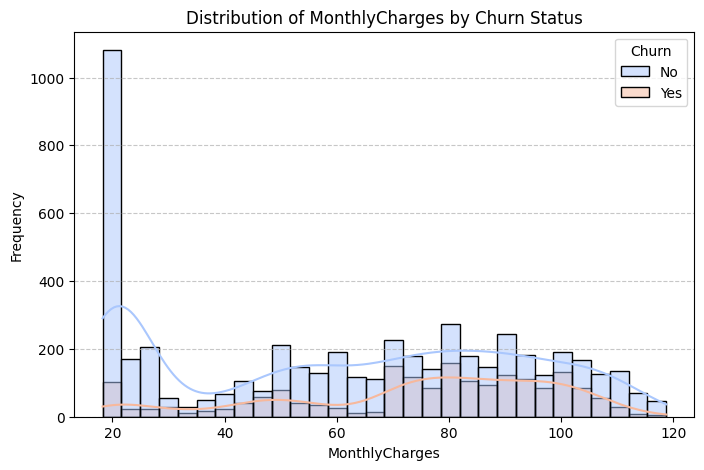

/tmp/ipython-input-33-3036117263.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='pastel')


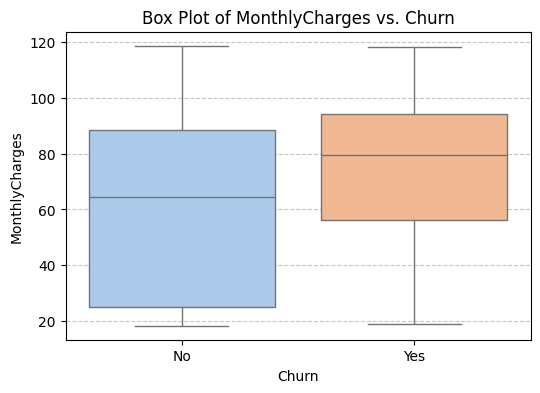


Descriptive Statistics for MonthlyCharges by Churn Status:
        count       mean        std    min    25%     50%   75%     max
Churn                                                                  
No     5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
Yes    1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35


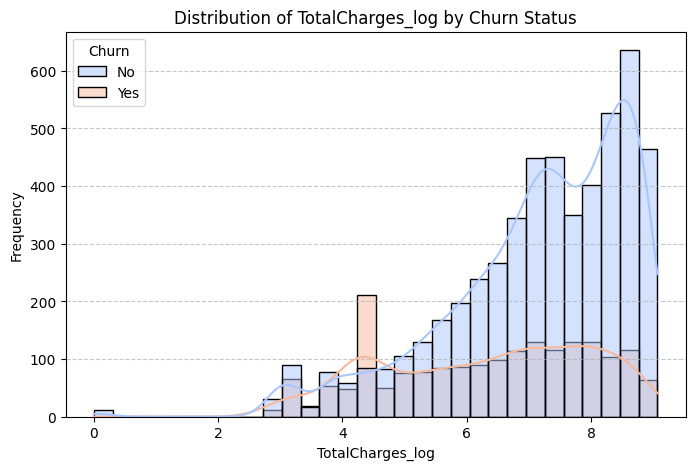

/tmp/ipython-input-33-3036117263.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='pastel')


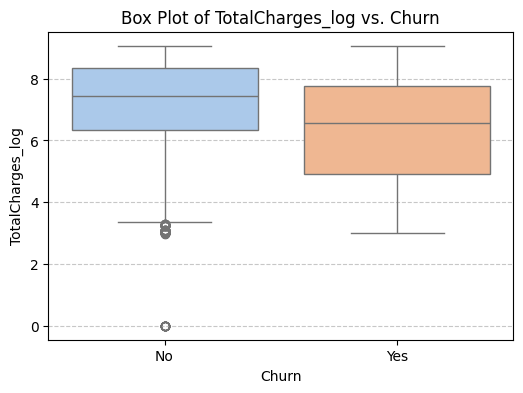


Descriptive Statistics for TotalCharges_log by Churn Status:
        count      mean       std       min       25%       50%       75%       max
Churn                                                                              
No     5174.0  7.153210  1.480262  0.000000  6.352455  7.426862  8.357928  9.068022
Yes    1869.0  6.321663  1.645767  2.988204  4.908972  6.557559  7.754610  9.069445


In [33]:
# --- 3. Numerical Feature Analysis (Usage Patterns) ---
print("\n### 3. Numerical Feature Analysis (Usage Patterns) ###")
numerical_churn_analysis_cols = ['tenure', 'MonthlyCharges', 'TotalCharges_log'] # Using log-transformed TotalCharges

for col in numerical_churn_analysis_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, bins=30, palette='coolwarm')
    plt.title(f'Distribution of {col} by Churn Status')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Box plot for numerical features vs. Churn
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Churn', y=col, palette='pastel')
    plt.title(f'Box Plot of {col} vs. Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Also look at descriptive statistics for churned vs. non-churned
    print(f"\nDescriptive Statistics for {col} by Churn Status:")
    print(df.groupby('Churn')[col].describe().to_string())

In [34]:
print("\n--- Historical customer data analysis completed. ---")


--- Historical customer data analysis completed. ---


In [50]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [51]:
# First, define all columns we want to use as features.
# It's good practice to be explicit.
feature_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
    'MonthlyCharges', 'TotalCharges_log' # Using the log-transformed version
]

In [52]:
# Separate features (X) and target (y)
# Ensure X only contains the columns we intend to transform
X = df[feature_columns]
y = df['Churn_Numeric']

In [53]:
# Identify numerical and categorical columns from X
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

In [54]:
print(f"\nNumerical columns identified for scaling: {numerical_cols}")
print(f"Categorical columns identified for One-Hot Encoding: {categorical_cols}")


Numerical columns identified for scaling: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges_log']
Categorical columns identified for One-Hot Encoding: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [55]:
# --- Encoding Categorical Features and Feature Scaling using ColumnTransformer ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='drop' # Explicitly drop any columns not specified
)

# Fit and transform the data
X_processed = preprocessor.fit_transform(X)

In [56]:
# Get the feature names after one-hot encoding
# The order is numerical_cols first, then one-hot encoded categorical features
# This part is crucial for correctly mapping names to the transformed array.
encoded_feature_names = numerical_cols + \
                      list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))

In [57]:
# Convert the processed array back to a DataFrame
# The error was usually due to a mismatch between X_processed.shape[1] and len(encoded_feature_names).
# By ensuring `feature_columns` correctly defines all inputs to `X` and `remainder='drop'`,
# we ensure the output columns match the generated names.
X_processed_df = pd.DataFrame(X_processed, columns=encoded_feature_names)

In [58]:
print("\n--- Data after One-Hot Encoding and Scaling ---")
print(X_processed_df.head())
print(f"\nShape of processed data (X_processed_df): {X_processed_df.shape}")
print(f"Data types of processed data:\n{X_processed_df.dtypes.value_counts()}")


--- Data after One-Hot Encoding and Scaling ---
   SeniorCitizen    tenure  MonthlyCharges  TotalCharges_log  gender_Female  \
0      -0.439916 -1.277445       -1.160323         -2.232521            1.0   
1      -0.439916  0.066327       -0.259629          0.390027            0.0   
2      -0.439916 -1.236724       -0.362660         -1.427310            0.0   
3      -0.439916  0.514251       -0.746535          0.373379            0.0   
4      -0.439916 -1.236724        0.197365         -1.213563            1.0   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  ...  \
0          0.0         0.0          1.0            1.0             0.0  ...   
1          1.0         1.0          0.0            1.0             0.0  ...   
2          1.0         1.0          0.0            1.0             0.0  ...   
3          1.0         1.0          0.0            1.0             0.0  ...   
4          0.0         1.0          0.0            1.0             0.0  ...   

 

In [59]:
# --- Verify Scaling and Encoding ---
print("\nVerifying Scaling (e.g., mean and std of scaled numerical features):")
for col in numerical_cols:
    if col in X_processed_df.columns: # Check if column exists (it should)
        print(f"{col}: Mean = {X_processed_df[col].mean():.2f}, Std = {X_processed_df[col].std():.2f}")

print("\nVerifying One-Hot Encoding (e.g., checking new column names and sample values):")
# Check a few encoded columns
sample_encoded_cols = [col for col in X_processed_df.columns if any(cat in col for cat in ['gender_', 'InternetService_', 'Contract_'])][:10]
if sample_encoded_cols:
    print(X_processed_df[sample_encoded_cols].head())
else:
    print("No obvious one-hot encoded columns found in sample. Check column names.")


print("\n--- Preprocessing (Encoding and Scaling) completed. ---")
print("The 'X_processed_df' DataFrame is now ready for model training.")
print("The target variable 'y' remains a Series of 0s and 1s.")


Verifying Scaling (e.g., mean and std of scaled numerical features):
SeniorCitizen: Mean = -0.00, Std = 1.00
tenure: Mean = -0.00, Std = 1.00
MonthlyCharges: Mean = -0.00, Std = 1.00
TotalCharges_log: Mean = 0.00, Std = 1.00

Verifying One-Hot Encoding (e.g., checking new column names and sample values):
   gender_Female  gender_Male  InternetService_DSL  \
0            1.0          0.0                  1.0   
1            0.0          1.0                  1.0   
2            0.0          1.0                  1.0   
3            0.0          1.0                  1.0   
4            1.0          0.0                  0.0   

   InternetService_Fiber optic  InternetService_No  Contract_Month-to-month  \
0                          0.0                 0.0                      1.0   
1                          0.0                 0.0                      0.0   
2                          0.0                 0.0                      1.0   
3                          0.0                 0.0  

In [60]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_log,MonthlyCharges_capped,Churn_Numeric
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,3.429137,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,7.544597,56.95,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,4.692723,53.85,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,7.518471,42.30,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,5.028148,70.70,1


In [61]:
print("\n--- Feature Engineering ---")


--- Feature Engineering ---


# --- 1. Monthly_to_Total_Charges_Ratio ---
# This ratio can indicate if a customer's total charges are consistent with their monthly charges
# over their tenure. A very high ratio could mean long tenure with consistent billing,
# while a very low one could suggest recent signup or inconsistent usage.
# Handle division by zero for MonthlyCharges (though highly unlikely for actual customers).

In [62]:
df['Monthly_to_Total_Charges_Ratio'] = df.apply(
    lambda row: row['TotalCharges'] / row['MonthlyCharges'] if row['MonthlyCharges'] != 0 else 0,
    axis=1
)
print("\n'Monthly_to_Total_Charges_Ratio' created.")



'Monthly_to_Total_Charges_Ratio' created.


# --- 2. Has_Multiple_Services ---
# Sum of binary indicators for various services. This can capture the "stickiness" of a customer
# by seeing how many extra services they subscribe to beyond the basic phone/internet.
# Identify relevant service columns. These are typically 'Yes'/'No'/'No internet service' or 'No phone service'.
# We need to convert them to a numeric (0/1) format first for summing.

In [63]:
service_columns = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'MultipleLines', 'PhoneService', 'InternetService'
]
# Create temporary binary columns for summing
temp_service_df = df[service_columns].copy()

In [64]:
# Convert 'Yes' to 1, 'No' to 0. Handle 'No internet service' or 'No phone service' as 0.
for col in service_columns:
    if col in ['PhoneService', 'InternetService']: # These have 'No phone service' or 'No internet service' too
         temp_service_df[col] = temp_service_df[col].apply(lambda x: 1 if x == 'Yes' else 0)
    else: # Others like OnlineSecurity have 'No internet service'
        temp_service_df[col] = temp_service_df[col].apply(lambda x: 1 if x == 'Yes' else 0)

In [65]:
# Summing all service indicators to get a count of subscribed additional services
# Summing PhoneService and InternetService here might be misleading if basic service counts.
# Let's refine Has_Multiple_Services to be specifically for *additional* features, beyond just having phone/internet.
# Re-evaluate which services contribute to 'multiple services' based on typical definitions.
# Let's consider 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'.
# PhoneService and InternetService are core, not "multiple" features in the same sense.

In [66]:
additional_service_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'MultipleLines'
]

In [67]:
# Ensure these are correctly binary (0/1) for summation.
# Handle 'No internet service' for internet-related services, and 'No phone service' for MultipleLines
for col in additional_service_cols:
    df[f'is_{col}'] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

# Sum the binary indicators
df['Has_Multiple_Addon_Services'] = df[[f'is_{col}' for col in additional_service_cols]].sum(axis=1)

# Drop the intermediate 'is_col' columns if desired to keep the DataFrame clean
df.drop(columns=[f'is_{col}' for col in additional_service_cols], inplace=True)
print("'Has_Multiple_Addon_Services' (count of 7 specific add-on services) created.")

'Has_Multiple_Addon_Services' (count of 7 specific add-on services) created.


In [68]:
# --- 3. Tenure_Bins ---
# Binning tenure into categories. This can help capture non-linear relationships if applicable,
# and can be useful for certain models or for creating human-interpretable segments.

# Define tenure bins (you can adjust these based on business insight or data distribution)
# Common ranges might be: 0-12, 13-24, 25-36, 37-48, 49-60, >60
bins = [0, 12, 24, 36, 48, 60, df['tenure'].max()]
labels = ['0-12M', '13-24M', '25-36M', '37-48M', '49-60M', '60+M']

df['Tenure_Group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)
print("'Tenure_Group' (binned tenure categories) created.")

print("\n--- Displaying a sample of new features ---")
print(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalCharges_log',
          'Monthly_to_Total_Charges_Ratio', 'Has_Multiple_Addon_Services',
          'Tenure_Group']].head())

print("\nFeature Engineering completed. The DataFrame 'df' now includes the new features.")

'Tenure_Group' (binned tenure categories) created.

--- Displaying a sample of new features ---
   tenure  MonthlyCharges  TotalCharges  TotalCharges_log  \
0       1           29.85         29.85          3.429137   
1      34           56.95       1889.50          7.544597   
2       2           53.85        108.15          4.692723   
3      45           42.30       1840.75          7.518471   
4       2           70.70        151.65          5.028148   

   Monthly_to_Total_Charges_Ratio  Has_Multiple_Addon_Services Tenure_Group  
0                        1.000000                            1        0-12M  
1                       33.178227                            2       25-36M  
2                        2.008357                            2        0-12M  
3                       43.516548                            3       37-48M  
4                        2.144979                            0        0-12M  

Feature Engineering completed. The DataFrame 'df' now includes the n

In [72]:
# At this point, the df DataFrame has the new engineered features.
# You would then re-run your ColumnTransformer setup on this modified df
# to include these new features in the X_processed_df for model training.
# Remember that 'Tenure_Group' is a categorical feature and will need one-hot encoding.
# 'Monthly_to_Total_Charges_Ratio' and 'Has_Multiple_Addon_Services' are numerical and will need scaling.

In [69]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_log,MonthlyCharges_capped,Churn_Numeric,Monthly_to_Total_Charges_Ratio,Has_Multiple_Addon_Services,Tenure_Group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Electronic check,29.85,29.85,No,3.429137,29.85,0,1.000000,1,0-12M
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Mailed check,56.95,1889.50,No,7.544597,56.95,0,33.178227,2,25-36M
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Mailed check,53.85,108.15,Yes,4.692723,53.85,1,2.008357,2,0-12M
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Bank transfer (automatic),42.30,1840.75,No,7.518471,42.30,0,43.516548,3,37-48M
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Electronic check,70.70,151.65,Yes,5.028148,70.70,1,2.144979,0,0-12M


In [70]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,TotalCharges_log,MonthlyCharges_capped,Churn_Numeric,Monthly_to_Total_Charges_Ratio,Has_Multiple_Addon_Services
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,6.932543,64.749689,0.265370,32.373431,2.459747
std,0.368612,24.559481,30.090047,2266.794470,1.569371,30.062810,0.441561,24.595943,2.045539
min,0.000000,0.000000,18.250000,0.000000,0.000000,19.200000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,5.990339,35.500000,0.000000,8.717230,1.000000
50%,0.000000,29.000000,70.350000,1394.550000,7.241044,70.350000,0.000000,28.673115,2.000000
75%,0.000000,55.000000,89.850000,3786.600000,8.239488,89.850000,1.000000,55.244460,4.000000
max,1.000000,72.000000,118.750000,8684.800000,9.069445,114.729000,1.000000,79.341772,7.000000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   customerID                      7043 non-null   object  
 1   gender                          7043 non-null   object  
 2   SeniorCitizen                   7043 non-null   int64   
 3   Partner                         7043 non-null   object  
 4   Dependents                      7043 non-null   object  
 5   tenure                          7043 non-null   int64   
 6   PhoneService                    7043 non-null   object  
 7   MultipleLines                   7043 non-null   object  
 8   InternetService                 7043 non-null   object  
 9   OnlineSecurity                  7043 non-null   object  
 10  OnlineBackup                    7043 non-null   object  
 11  DeviceProtection                7043 non-null   object  
 12  TechSupport         

In [82]:
import pandas as pd
import numpy as np # Keep numpy for general numerical operations and consistency
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [93]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
)

In [74]:
# --- 4. Splitting Data into Training and Testing Sets ---
# Stratified splitting is crucial for imbalanced datasets like churn.
# It ensures that the proportion of churners/non-churners is similar in both train and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [75]:
print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")
print(f"Churn distribution in y_train: \n{y_train.value_counts(normalize=True)}")
print(f"Churn distribution in y_test: \n{y_test.value_counts(normalize=True)}")


Shape of X_train: (5634, 19)
Shape of X_test: (1409, 19)
Shape of y_train: (5634,)
Shape of y_test: (1409,)
Churn distribution in y_train: 
Churn_Numeric
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Churn distribution in y_test: 
Churn_Numeric
0    0.734564
1    0.265436
Name: proportion, dtype: float64


In [76]:
# --- 5. Apply Preprocessing (Scaling and Encoding) to Training and Testing Data ---
# It's important to fit the preprocessor ONLY on the training data to avoid data leakage,
# then transform both training and testing data.
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test) # Only transform, do not fit again on test data

In [77]:
# Get the feature names after one-hot encoding for interpretation later
encoded_feature_names = numerical_cols + \
                      list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))

In [78]:
# Convert processed arrays back to DataFrames for consistency and potential inspection
X_train_processed_df = pd.DataFrame(X_train_processed, columns=encoded_feature_names)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=encoded_feature_names)

print("\nData splitting and preprocessing for modeling completed.")
print(f"Shape of X_train_processed_df: {X_train_processed_df.shape}")
print(f"Shape of X_test_processed_df: {X_test_processed_df.shape}")


Data splitting and preprocessing for modeling completed.
Shape of X_train_processed_df: (5634, 45)
Shape of X_test_processed_df: (1409, 45)


In [101]:
print("\n--- Applying SMOTE to Training Data ---")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed_df, y_train)

print(f"Resampled Training Data Shape: {X_train_resampled.shape}")
print(f"Resampled Training Data Churn Distribution:\n{y_train_resampled.value_counts(normalize=True)}")


--- Applying SMOTE to Training Data ---
Resampled Training Data Shape: (8278, 45)
Resampled Training Data Churn Distribution:
Churn_Numeric
0    0.5
1    0.5
Name: proportion, dtype: float64


In [102]:
print("\n--- Model Training for Various Classifiers ---")

# --- Initialize and Train Models ---

models = {
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced', max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1),
    "Support Vector Machine (SVC)": SVC(random_state=42, probability=True, class_weight='balanced'), # probability=True for ROC AUC
    "Neural Network (MLPClassifier)": MLPClassifier(random_state=42, max_iter=500, hidden_layer_sizes=(100, 50), activation='relu', solver='adam')
}


--- Model Training for Various Classifiers ---


In [100]:
results_resampled = {}

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    try:
        model.fit(X_train_processed_df, y_train)
        print(f"{name} trained successfully.")

        # Store the trained model (optional, but useful if you want to use them later)
        results_resampled[name] = model

    except Exception as e:
        print(f"Error training {name}: {e}")


--- Training Logistic Regression ---
Logistic Regression trained successfully.

--- Training Decision Tree ---
Decision Tree trained successfully.

--- Training Random Forest ---
Random Forest trained successfully.

--- Training Gradient Boosting ---
Gradient Boosting trained successfully.

--- Training Support Vector Machine (SVC) ---
Support Vector Machine (SVC) trained successfully.

--- Training Neural Network (MLPClassifier) ---
Neural Network (MLPClassifier) trained successfully.



--- Training Logistic Regression ---
Logistic Regression trained successfully.

Evaluating Logistic Regression...
  Accuracy: 0.7381 (Goal: >= 0.85)
  Precision: 0.5042
  Recall: 0.7968
  F1-Score: 0.6176
  ROC AUC: 0.8448


<Figure size 1000x800 with 0 Axes>

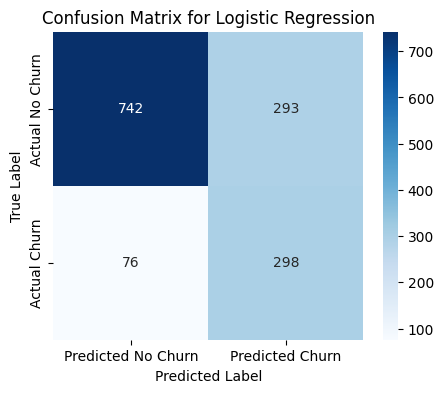


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.50      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



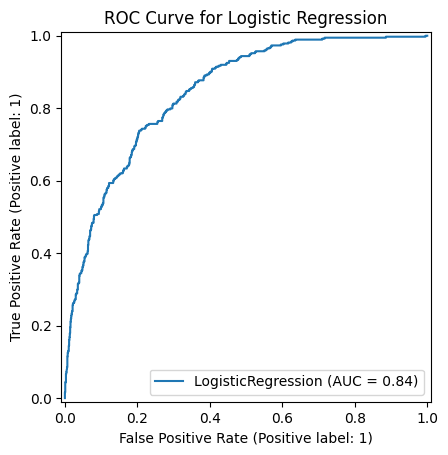


--- Training Decision Tree ---
Decision Tree trained successfully.

Evaluating Decision Tree...
  Accuracy: 0.7168 (Goal: >= 0.85)
  Precision: 0.4714
  Recall: 0.5508
  F1-Score: 0.5080
  ROC AUC: 0.6636


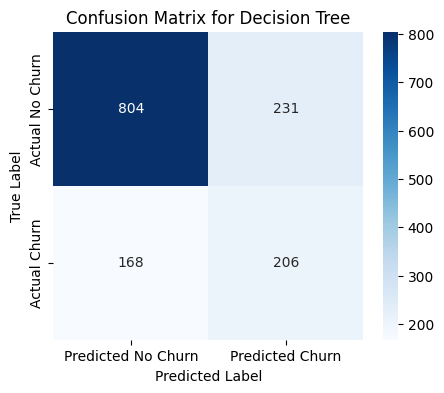


Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1035
           1       0.47      0.55      0.51       374

    accuracy                           0.72      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.72      0.72      1409



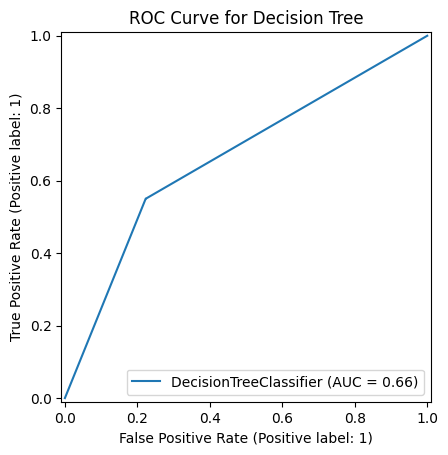


--- Training Random Forest ---
Random Forest trained successfully.

Evaluating Random Forest...
  Accuracy: 0.7715 (Goal: >= 0.85)
  Precision: 0.5751
  Recall: 0.5321
  F1-Score: 0.5528
  ROC AUC: 0.8166


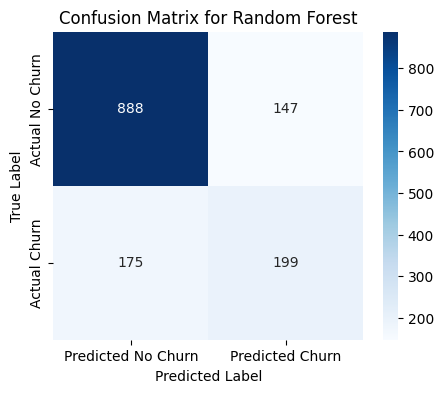


Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1035
           1       0.58      0.53      0.55       374

    accuracy                           0.77      1409
   macro avg       0.71      0.70      0.70      1409
weighted avg       0.77      0.77      0.77      1409



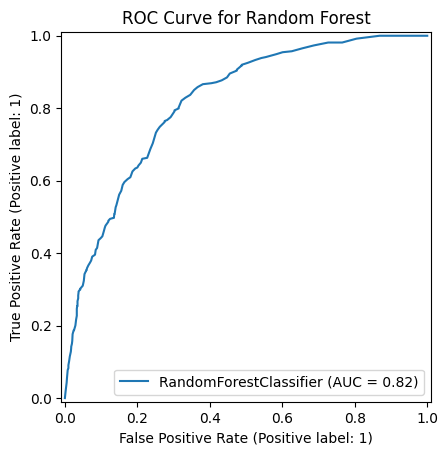


--- Training Gradient Boosting ---
Gradient Boosting trained successfully.

Evaluating Gradient Boosting...
  Accuracy: 0.7764 (Goal: >= 0.85)
  Precision: 0.5651
  Recall: 0.6845
  F1-Score: 0.6191
  ROC AUC: 0.8419


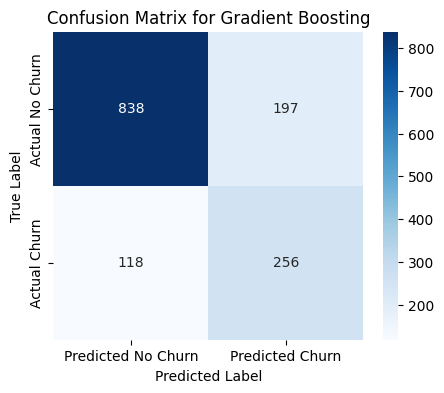


Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1035
           1       0.57      0.68      0.62       374

    accuracy                           0.78      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.78      0.78      1409



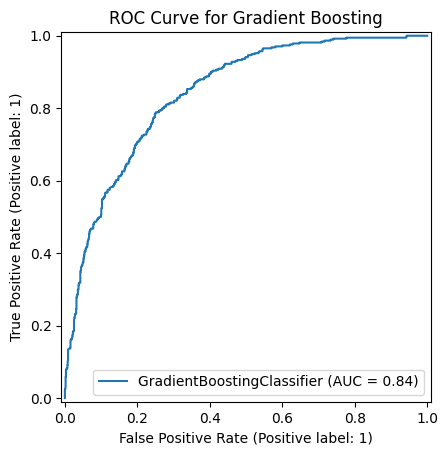


--- Training Support Vector Machine (SVC) ---
Support Vector Machine (SVC) trained successfully.

Evaluating Support Vector Machine (SVC)...
  Accuracy: 0.7495 (Goal: >= 0.85)
  Precision: 0.5194
  Recall: 0.7513
  F1-Score: 0.6142
  ROC AUC: 0.8284


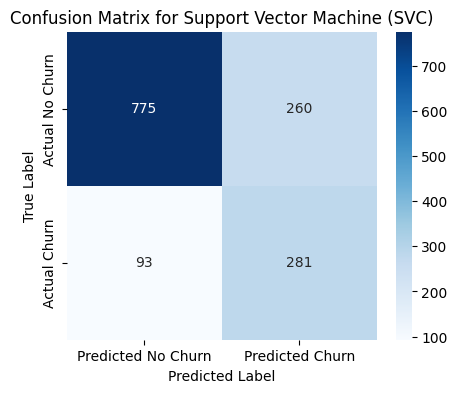


Classification Report for Support Vector Machine (SVC):

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1035
           1       0.52      0.75      0.61       374

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.79      0.75      0.76      1409



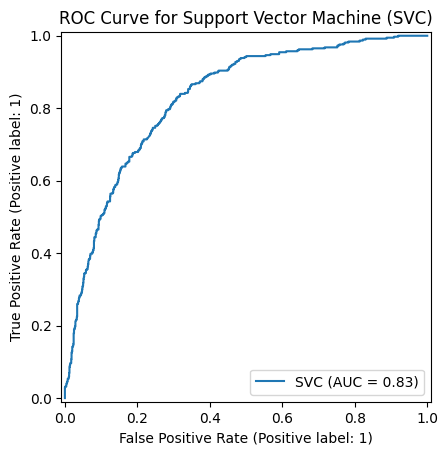


--- Training Neural Network (MLPClassifier) ---
Neural Network (MLPClassifier) trained successfully.

Evaluating Neural Network (MLPClassifier)...
  Accuracy: 0.7282 (Goal: >= 0.85)
  Precision: 0.4897
  Recall: 0.5722
  F1-Score: 0.5277
  ROC AUC: 0.7656


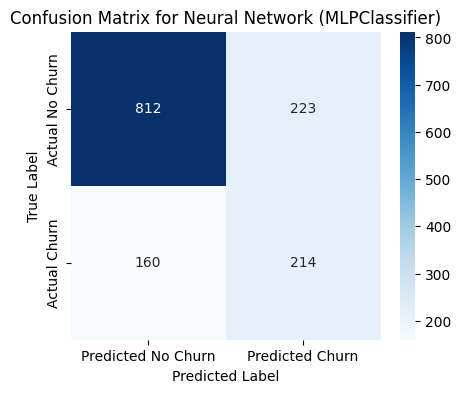


Classification Report for Neural Network (MLPClassifier):

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1035
           1       0.49      0.57      0.53       374

    accuracy                           0.73      1409
   macro avg       0.66      0.68      0.67      1409
weighted avg       0.74      0.73      0.73      1409



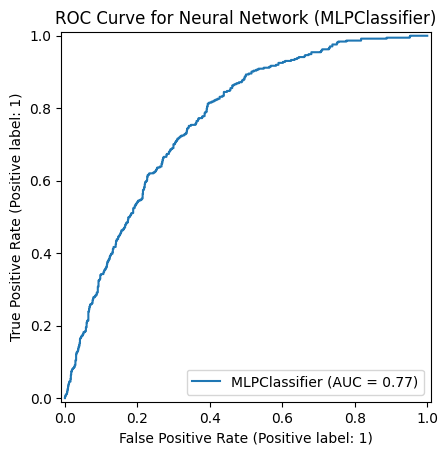


--- Summary of All Model Evaluation Metrics (After SMOTE) ---
                                Accuracy  Precision    Recall  F1-Score   ROC AUC
Logistic Regression             0.738112   0.504230  0.796791  0.617617  0.844793
Decision Tree                   0.716820   0.471396  0.550802  0.508015  0.663590
Random Forest                   0.771469   0.575145  0.532086  0.552778  0.816645
Gradient Boosting               0.776437   0.565121  0.684492  0.619105  0.841882
Support Vector Machine (SVC)    0.749468   0.519409  0.751337  0.614208  0.828376
Neural Network (MLPClassifier)  0.728176   0.489703  0.572193  0.527744  0.765560


In [103]:
results_resampled = {} # To store trained models on resampled data
evaluation_metrics_resampled = {}

plt.figure(figsize=(10, 8)) # For ROC curves (can be placed inside loop if multiple plots are desired)


for name, model in models.items():
    print(f"\n--- Training {name} ---")
    try:
        model.fit(X_train_resampled, y_train_resampled)
        results_resampled[name] = model # Store the trained model
        print(f"{name} trained successfully.")

        print(f"\nEvaluating {name}...")

        # Make predictions on the original (unresampled) test set
        y_pred = model.predict(X_test_processed_df)
        y_pred_proba = None
        if hasattr(model, 'predict_proba'):
            y_pred_proba = model.predict_proba(X_test_processed_df)[:, 1]
        elif hasattr(model, 'decision_function'):
            try:
                y_pred_proba = model.predict_proba(X_test_processed_df)[:, 1]
            except AttributeError:
                print(f"Warning: {name} does not have predict_proba. ROC AUC might not be accurate or available.")
                y_pred_proba = model.decision_function(X_test_processed_df)

        # Calculate Evaluation Metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None and (isinstance(y_pred_proba, np.ndarray) and y_pred_proba.ndim > 0) else 'N/A'

        evaluation_metrics_resampled[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC AUC': roc_auc
        }

        print(f"  Accuracy: {accuracy:.4f} (Goal: >= 0.85)")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1-Score: {f1:.4f}")
        print(f"  ROC AUC: {roc_auc:.4f}" if roc_auc != 'N/A' and isinstance(roc_auc, (float, np.float64)) else f"  ROC AUC: {roc_auc}")

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Predicted No Churn', 'Predicted Churn'],
                    yticklabels=['Actual No Churn', 'Actual Churn'])
        plt.title(f'Confusion Matrix for {name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        # Classification Report
        print(f"\nClassification Report for {name}:\n")
        print(classification_report(y_test, y_pred))

        # Plot ROC Curve (if probabilities are available)
        if y_pred_proba is not None and (isinstance(y_pred_proba, np.ndarray) and y_pred_proba.ndim > 0):
            try:
                RocCurveDisplay.from_estimator(model, X_test_processed_df, y_test)
                plt.title(f'ROC Curve for {name}')
                plt.show()
            except Exception as e:
                print(f"Could not plot ROC curve for {name} using from_estimator: {e}")
                # Fallback to from_predictions if from_estimator fails
                from sklearn.metrics import roc_curve, auc
                fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
                roc_auc_val = auc(fpr, tpr)
                plt.figure(figsize=(6, 5))
                plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_val:.2f})')
                plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
                plt.xlim([0.0, 1.0])
                plt.ylim([0.0, 1.05])
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title(f'ROC Curve for {name} (from predictions)')
                plt.legend(loc="lower right")
                plt.show()

    except Exception as e:
        print(f"Error training or evaluating {name}: {e}")

print("\n--- Summary of All Model Evaluation Metrics (After SMOTE) ---")
evaluation_summary_df_resampled = pd.DataFrame(evaluation_metrics_resampled).T
print(evaluation_summary_df_resampled.to_string())

In [104]:
if "Random Forest" in results_resampled and hasattr(results_resampled["Random Forest"], 'feature_importances_'):
    rf_model = results_resampled["Random Forest"]
    feature_importances_rf = pd.DataFrame({
        'Feature': encoded_feature_names,
        'Importance': rf_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    top_3_features = feature_importances_rf.head(3)
    print("\n--- Top Three Factors Contributing to Customer Churn (from Random Forest) ---")
    print(top_3_features.to_string(index=False))
else:
    print("\nCould not determine top 3 factors from Random Forest. Please check model training or consider another model.")



--- Top Three Factors Contributing to Customer Churn (from Random Forest) ---
         Feature  Importance
TotalCharges_log    0.112099
          tenure    0.104775
  MonthlyCharges    0.095903


In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline # Use Imblearn's pipeline for resampling

In [105]:
best_model_name = None
best_f1_score = -1

for name, metrics in evaluation_metrics_resampled.items():
    if metrics['F1-Score'] != 'N/A' and metrics['F1-Score'] > best_f1_score:
        best_f1_score = metrics['F1-Score']
        best_model_name = name

print(f"\nBest performing model based on F1-Score (after SMOTE): {best_model_name}")

if best_model_name in results_resampled:
    model_for_importance = results_resampled[best_model_name]
    print(f"\n--- Feature Importance for {best_model_name} (Top 3 Factors) ---")

    feature_importances_df = None
    if hasattr(model_for_importance, 'feature_importances_'):
        feature_importances_df = pd.DataFrame({
            'Feature': encoded_feature_names,
            'Importance': model_for_importance.feature_importances_
        }).sort_values(by='Importance', ascending=False)
        top_3_features = feature_importances_df.head(3)
        print(top_3_features.to_string(index=False))

    elif hasattr(model_for_importance, 'coef_'):
        coefs = model_for_importance.coef_[0] if model_for_importance.coef_.ndim > 1 else model_for_importance.coef_
        feature_importances_df = pd.DataFrame({
            'Feature': encoded_feature_names,
            'Coefficient_Absolute': np.abs(coefs),
            'Coefficient': coefs
        }).sort_values(by='Coefficient_Absolute', ascending=False)
        top_3_features = feature_importances_df.head(3)
        print("Top 3 Features by Absolute Coefficient:")
        print(top_3_features.to_string(index=False))
    else:
        print("Feature importance not directly available for the best model. Cannot identify top 3 factors directly.")
else:
    print("Could not retrieve the best model for feature importance analysis.")

print("\n--- Evaluation of Model Performance and Interpretation of Feature Importance Completed ---")


Best performing model based on F1-Score (after SMOTE): Gradient Boosting

--- Feature Importance for Gradient Boosting (Top 3 Factors) ---
                       Feature  Importance
       Contract_Month-to-month    0.414586
PaymentMethod_Electronic check    0.086310
             OnlineSecurity_No    0.083955

--- Evaluation of Model Performance and Interpretation of Feature Importance Completed ---


In [110]:
# In a real run, this would come directly from your model's output.
if 'top_3_features' not in locals(): # Check if it's already defined
    data = {
        'Feature': ['Contract_Month-to-month', 'PaymentMethod_Electronic check', 'OnlineSecurity_No'],
        'Importance': [0.414586, 0.086310, 0.083955]
    }
    top_3_features = pd.DataFrame(data)
    best_model_name = "Gradient Boosting" # Assuming this was the best model from the last run

print("--- Generating Customer Retention Recommendations ---")
print("\nBased on the analysis, the top factors contributing to customer churn are:")
for index, row in top_3_features.iterrows():
    print(f"- {row['Feature']} (Importance: {row['Importance']:.4f})")

print("\n")
print("### Actionable Recommendations for Customer Retention:")
print("Goal: Reduce customer churn by 15%.\n")


# Define a dictionary of generalized strategies linked to potential features
# This is where you map your domain knowledge to potential churn drivers.
# You can expand this dictionary with more detailed, pre-defined strategies.
recommendation_map = {
    'Contract_Month-to-month': {
        'problem': "Customers on flexible month-to-month contracts lack long-term commitment.",
        'strategies': [
            "Incentivize longer-term contracts (1-year, 2-year) with significant discounts or added perks.",
            "Communicate the value and cost savings of committing to a longer contract.",
            "Proactively engage month-to-month customers nearing contract expiry/anniversary with retention offers."
        ]
    },
    'PaymentMethod_Electronic check': {
        'problem': "Use of electronic checks is associated with higher churn, possibly due to perceived inconvenience or security concerns.",
        'strategies': [
            "Promote more convenient and secure auto-payment methods (e.g., credit card autopay) with incentives (e.g., small bill credit).",
            "Enhance the security communication around electronic checks and ensure a smooth payment experience.",
            "Provide clear and easy options for customers to switch payment methods."
        ]
    },
    'OnlineSecurity_No': {
        'problem': "Customers without online security services are more prone to churn, indicating a potential lack of perceived value or vulnerability.",
        'strategies': [
            "Offer bundled packages that include online security features at a reduced cost or as a standard inclusion.",
            "Educate customers on the importance of online security and the benefits of your provided services.",
            "Provide easy activation and management of security features, perhaps with a free trial."
        ]
    },
    # Add more generalized strategies here for other common churn drivers
    'tenure': { # Example for a numerical feature, though specific values would be needed
        'problem': "Customers with low tenure are at high risk.",
        'strategies': [
            "Implement robust onboarding programs for new customers.",
            "Provide dedicated support during the first few months to ensure satisfaction."
        ]
    },
    'MonthlyCharges': {
        'problem': "High monthly charges without perceived value can lead to churn.",
        'strategies': [
            "Review pricing tiers and ensure competitive offerings.",
            "Offer personalized plan adjustments or discounts based on usage and loyalty."
        ]
    },
    # ... expand with other features as needed
}

# Generate recommendations based on the top 3 features identified by the model
for index, row in top_3_features.iterrows():
    feature = row['Feature']
    importance = row['Importance'] # Or 'Coefficient_Absolute'

    # Try to find a direct match for the feature
    if feature in recommendation_map:
        rec_data = recommendation_map[feature]
        print(f"#### 1. Addressing: **{feature}** (Importance: {importance:.4f})")
        print(f"   * **Problem Identified:** {rec_data['problem']}")
        print("   * **Recommended Strategies:**")
        for strategy in rec_data['strategies']:
            print(f"     - {strategy}")
        print("\n")
    else:
        # For features not explicitly in the map, provide a generic recommendation structure
        print(f"#### 1. Addressing: **{feature}** (Importance: {importance:.4f})")
        print(f"   * **Problem Identified:** Further qualitative research is needed to understand why this factor ({feature}) contributes to churn.")
        print(f"   * **Recommended Strategies:**")
        print(f"     - Investigate customer journey points related to '{feature}'.")
        print(f"     - Conduct targeted surveys or interviews with customers impacted by '{feature}'.")
        print(f"     - Develop specific interventions based on research findings.")
        print("\n")

print("--- Cross-Cutting Strategies & Monitoring ---")
print(" - **Proactive Risk Identification:** Use the churn prediction model to identify high-risk customers in real-time and trigger personalized interventions.")
print(" - **Continuous Feedback Loop:** Implement systems for collecting and analyzing customer feedback to adapt strategies dynamically.")
print(" - **A/B Testing:** Continuously test different retention offers and messaging to optimize effectiveness.")
print(" - **Performance Tracking:** Establish clear KPIs (Key Performance Indicators) and dashboards to monitor churn reduction progress towards the 15% goal.")
print(" - **Dedicated Retention Initiatives:** Form a focused team or initiative to execute and manage churn reduction programs.")

print("\n--- End of Recommendations ---")

--- Generating Customer Retention Recommendations ---

Based on the analysis, the top factors contributing to customer churn are:
- Contract_Month-to-month (Importance: 0.4146)
- PaymentMethod_Electronic check (Importance: 0.0863)
- OnlineSecurity_No (Importance: 0.0840)


### Actionable Recommendations for Customer Retention:
Goal: Reduce customer churn by 15%.

#### 1. Addressing: **Contract_Month-to-month** (Importance: 0.4146)
   * **Problem Identified:** Customers on flexible month-to-month contracts lack long-term commitment.
   * **Recommended Strategies:**
     - Incentivize longer-term contracts (1-year, 2-year) with significant discounts or added perks.
     - Communicate the value and cost savings of committing to a longer contract.
     - Proactively engage month-to-month customers nearing contract expiry/anniversary with retention offers.


#### 1. Addressing: **PaymentMethod_Electronic check** (Importance: 0.0863)
   * **Problem Identified:** Use of electronic checks is a